In [1]:
# import packages
from neural_network import NeuralNetwork
import numpy as np
import matplotlib.pyplot as plt
from reg_utils import sigmoid, relu, plot_decision_boundary, initialize_parameters, load_2D_dataset, predict_dec
from reg_utils import compute_cost, predict, forward_propagation, backward_propagation, update_parameters
import sklearn
import sklearn.datasets
import scipy.io
from testCases import *
import datetime

%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

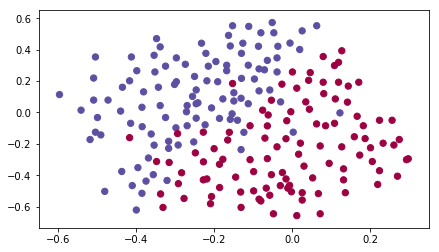

In [2]:
train_X, train_Y, test_X, test_Y = load_2D_dataset()

In [3]:
#Functions to be used later

def show_costs(costs, learning_rate):
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (x1,000)')
    plt.ylim(0,1)
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()

def plot_decision_boundary(nn, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = np.c_[xx.ravel(), yy.ravel()]
    Z = nn.predict(Z.T)
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)
             
    plt.xlim([-0.75,0.40])
    plt.ylim([-0.75,0.65])

    plt.show()

    '''
def plot_decision_boundary(nn, X, y):
    x_min = np.min(X[0,:]) - 1
    x_max = np.max(X[0,:]) + 1
    y_min = np.min(X[1,:]) - 1
    y_max = np.max(X[1,:]) + 1
    h = 0.01
    
    xx, yy = np.meshgrid(np.arange(x_min,x_max, h), np.arange(y_min, y_max, h))
    
    X = np.c_[xx.ravel(), yy.ravel()]
    Z = nn.predict(X)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx,yy,Z,cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)
    plt.show()'''
    
def model(train_x, train_y, test_x, test_y, layer_dims, optimizer = 'gd', learning_rate = 0.05, batch_size = 64, num_epochs = 7500, init_method = 'standard', lambd = 0, keep_prob = 1,
         beta1 = 0.9, beta2 = 0.999, epsilon = 10**-8, print_costs = True):
    np.random.seed(3)
    nn = NeuralNetwork(layer_dims, init_method = init_method)
    print(nn)

    np.random.seed(1)
    start = datetime.datetime.now()
    costs = nn.train(train_x, train_y, optimizer = optimizer, learning_rate = learning_rate, batch_size = batch_size, num_epochs = num_epochs,
                      lambd = lambd, keep_prob = keep_prob, beta1 = beta1, beta2 = beta2, epsilon = epsilon, print_costs=print_costs)
    elapsed = datetime.datetime.now() - start

    show_costs(costs, learning_rate=learning_rate)

    train_predict = nn.predict(train_x)
    test_predict = nn.predict(test_x)

    NeuralNetwork.print_accuracy(train_predict,train_y,"Train")
    NeuralNetwork.print_accuracy(test_predict,test_y,'Test')
    print('Training time elapsed: {}'.format(elapsed))
    
    plot_decision_boundary(nn, train_x, train_y)
    return nn


In [ ]:
# Baseline
layers_dims = [train_X.shape[0], 20, 3, 1]
nn = model(train_X, train_Y, test_X, test_Y, layers_dims, learning_rate = 0.3, batch_size=train_X.shape[1], num_epochs=30000, init_method='xavier', print_costs = True)




In [ ]:
# L2 regularization
layers_dims = [train_X.shape[0], 20, 3, 1]
nn = model(train_X, train_Y, test_X, test_Y, layers_dims, learning_rate = 0.3, batch_size=train_X.shape[1], num_epochs=30000, init_method='xavier', keep_prob = 1, lambd = 0.7, print_costs = True)

In [ ]:
# Testing dropout
layers_dims = [train_X.shape[0], 20, 3, 1]
nn = model(train_X, train_Y, test_X, test_Y, layers_dims, learning_rate = 0.3, batch_size=train_X.shape[1], num_epochs=30000, init_method='xavier', keep_prob = 0.86, print_costs = True)

Layer 1:
	W.shape: (20, 2)
	b.shape: (20, 1)
	initialization method: xavier
	activation method: relu

Layer 2:
	W.shape: (3, 20)
	b.shape: (3, 1)
	initialization method: xavier
	activation method: relu

Layer 3:
	W.shape: (1, 3)
	b.shape: (1, 1)
	initialization method: xavier
	activation method: sigmoid




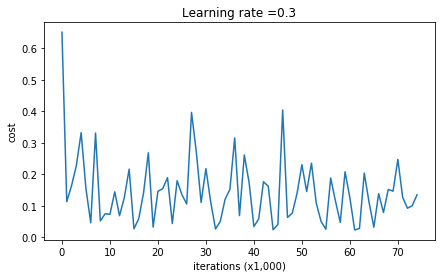

Train accuracy: 95.73459715639811%
Test accuracy: 92.5%
Training time elapsed: 0:00:16.188065


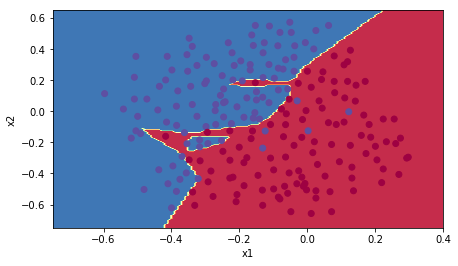

In [6]:
# Baseline with minibatches
layers_dims = [train_X.shape[0], 20, 3, 1]
nn = model(train_X, train_Y, test_X, test_Y, layers_dims, learning_rate = 0.3, init_method='xavier', keep_prob = 1, print_costs = True)

In [ ]:
# L2 regularization with minibatches
layers_dims = [train_X.shape[0], 20, 3, 1]
nn = model(train_X, train_Y, test_X, test_Y, layers_dims, learning_rate = 0.3, init_method='xavier', keep_prob = 1, lambd = 0.7, print_costs = True)

In [ ]:
# Testing dropout with minibatches
layers_dims = [train_X.shape[0], 20, 3, 1]
nn = model(train_X, train_Y, test_X, test_Y, layers_dims, learning_rate = 0.3, init_method='xavier', keep_prob = 0.86, print_costs = True)

Layer 1:
	W.shape: (20, 2)
	b.shape: (20, 1)
	initialization method: xavier
	activation method: relu

Layer 2:
	W.shape: (3, 20)
	b.shape: (3, 1)
	initialization method: xavier
	activation method: relu

Layer 3:
	W.shape: (1, 3)
	b.shape: (1, 1)
	initialization method: xavier
	activation method: sigmoid


Cost after epoch 0/30000: 0.6557412523481002
Cost after epoch 1000/30000: 0.2227163426696886
Cost after epoch 2000/30000: 0.19561677137282632
Cost after epoch 3000/30000: 0.17822129797970798
Cost after epoch 4000/30000: 0.17291960552885807
Cost after epoch 5000/30000: 0.16876297258043554
Cost after epoch 6000/30000: 0.16453909335404307
Cost after epoch 7000/30000: 0.159657918919818
Cost after epoch 8000/30000: 0.15547421579700704
Cost after epoch 9000/30000: 0.1529335635125898
Cost after epoch 10000/30000: 0.15103084074498604
Cost after epoch 11000/30000: 0.14987186103288333
Cost after epoch 12000/30000: 0.14927062132433785
Cost after epoch 13000/30000: 0.14870569023191793
Cost after 

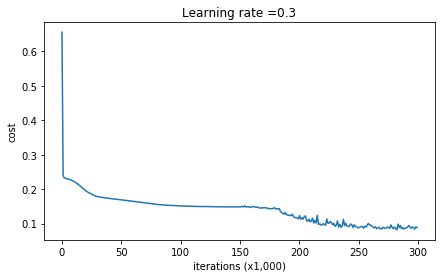

Train accuracy: 95.73459715639811%
Test accuracy: 91.5%
Training time elapsed: 0:00:24.610627


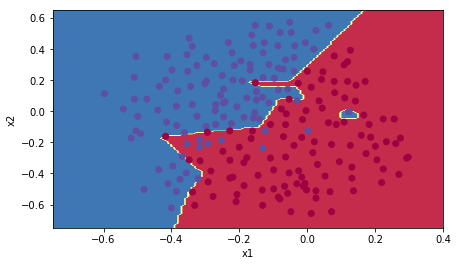

In [4]:
# Testing baseline and Momentum
layers_dims = [train_X.shape[0], 20, 3, 1]
nn = model(train_X, train_Y, test_X, test_Y, layers_dims, batch_size=train_X.shape[1], num_epochs=30000, optimizer='momentum', learning_rate = 0.3, init_method='xavier', print_costs = True)

Layer 1:
	W.shape: (20, 2)
	b.shape: (20, 1)
	initialization method: xavier
	activation method: relu

Layer 2:
	W.shape: (3, 20)
	b.shape: (3, 1)
	initialization method: xavier
	activation method: relu

Layer 3:
	W.shape: (1, 3)
	b.shape: (1, 1)
	initialization method: xavier
	activation method: sigmoid


Cost after epoch 0/7500: 0.6519346638348783
Cost after epoch 1000/7500: 0.15285309943149314
Cost after epoch 2000/7500: 0.14667005153243215
Cost after epoch 3000/7500: 0.3027503105758167
Cost after epoch 4000/7500: 0.04728814627080132
Cost after epoch 5000/7500: 0.293862468505567
Cost after epoch 6000/7500: 0.276681893265848
Cost after epoch 7000/7500: 0.3352418252567505


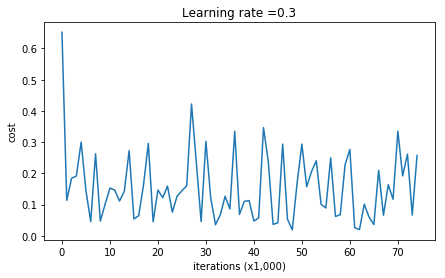

Train accuracy: 94.7867298578199%
Test accuracy: 94.0%
Training time elapsed: 0:00:17.033346


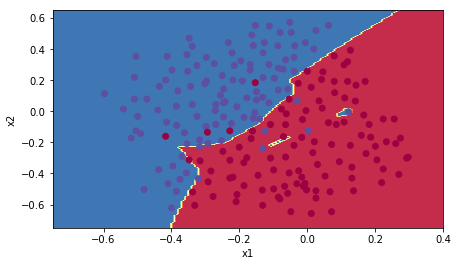

In [5]:
# Testing minibatches and Momentum
layers_dims = [train_X.shape[0], 20, 3, 1]
nn = model(train_X, train_Y, test_X, test_Y, layers_dims, optimizer='momentum', learning_rate = 0.3, init_method='xavier', print_costs = True)

Layer 1:
	W.shape: (20, 2)
	b.shape: (20, 1)
	initialization method: xavier
	activation method: relu

Layer 2:
	W.shape: (3, 20)
	b.shape: (3, 1)
	initialization method: xavier
	activation method: relu

Layer 3:
	W.shape: (1, 3)
	b.shape: (1, 1)
	initialization method: xavier
	activation method: sigmoid


Cost after epoch 0/7500: 0.5011731833609071
Cost after epoch 1000/7500: 0.12306450854315212
Cost after epoch 2000/7500: 0.23464572616813284
Cost after epoch 3000/7500: 0.40401998670454253
Cost after epoch 4000/7500: 0.1008300574862613


/home/jovyan/work/week5/Regularization/neural_network.py:130: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-Z))


Cost after epoch 5000/7500: 0.28929638874036506
Cost after epoch 6000/7500: 0.18825538039251255
Cost after epoch 7000/7500: 0.25899731560698985


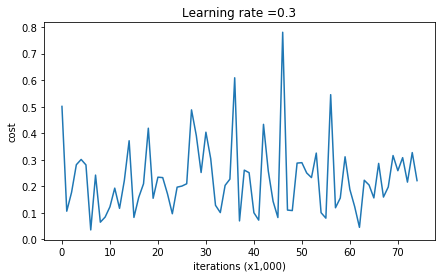

Train accuracy: 91.4691943127962%
Test accuracy: 93.0%
Training time elapsed: 0:00:20.453280


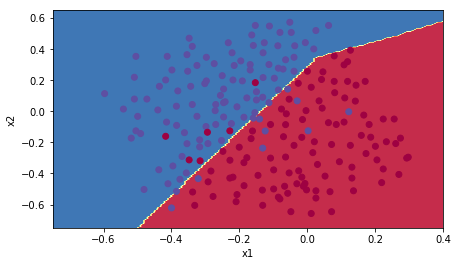

In [7]:
# Testing minibatches and Adam
layers_dims = [train_X.shape[0], 20, 3, 1]
nn = model(train_X, train_Y, test_X, test_Y, layers_dims, optimizer='adam', learning_rate = 0.3, init_method='xavier', print_costs = True)